In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
# Data is from Beureau for Transportation Statistics for 2016 
# https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp?pn=1
df = pd.read_csv('airline_arrivals_2016.csv')
df.columns

Index(['year', ' month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', ' weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       ' arr_delay', ' carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'Unnamed: 21'],
      dtype='object')

In [3]:
#drop redundant info
df = df.drop(['year', 'carrier', 'airport_name', 'Unnamed: 21'], axis=1)

In [4]:
print(df.groupby('carrier_name').describe())

                          arr_delay                                    \
                              count          mean           std   min   
carrier_name                                                            
Alaska Airlines Inc.          779.0   1279.363286   3946.309212   0.0   
American Airlines Inc.       1104.0   9700.511775  22082.049166   0.0   
Delta Air Lines Inc.         1780.0   4583.101124  17507.427107   0.0   
ExpressJet Airlines Inc.     1941.0   3250.707367   8914.888616   0.0   
Frontier Airlines Inc.        605.0   2514.333884   5325.796444   0.0   
Hawaiian Airlines Inc.        204.0   1342.799020   2907.315611   0.0   
JetBlue Airways               770.0   5525.377922  11486.303729   0.0   
SkyWest Airlines Inc.        2269.0   2973.943587   8445.306529   0.0   
Southwest Airlines Co.       1039.0  11126.177093  15277.266928  65.0   
Spirit Air Lines              411.0   5044.693431   5030.302086   0.0   
United Air Lines Inc.        1046.0   6077.393881  

In [5]:
df_numerical = df.drop(['carrier_name', 'airport'], axis=1).reset_index()

Let's get some quick graphs to show general trends
This is good practice in general as it helps you see if your data:
a) Makes sense
b) Do variable transformations make sense
c) Check for outliers

In [6]:
df_melt = pd.melt(df_numerical, id_vars=['index', ' arr_delay'])
df_melt_group = df_melt.groupby(['variable', 'value'])[' arr_delay'].mean().reset_index()

In [7]:
df_melt_group.columns

Index(['variable', 'value', ' arr_delay'], dtype='object')

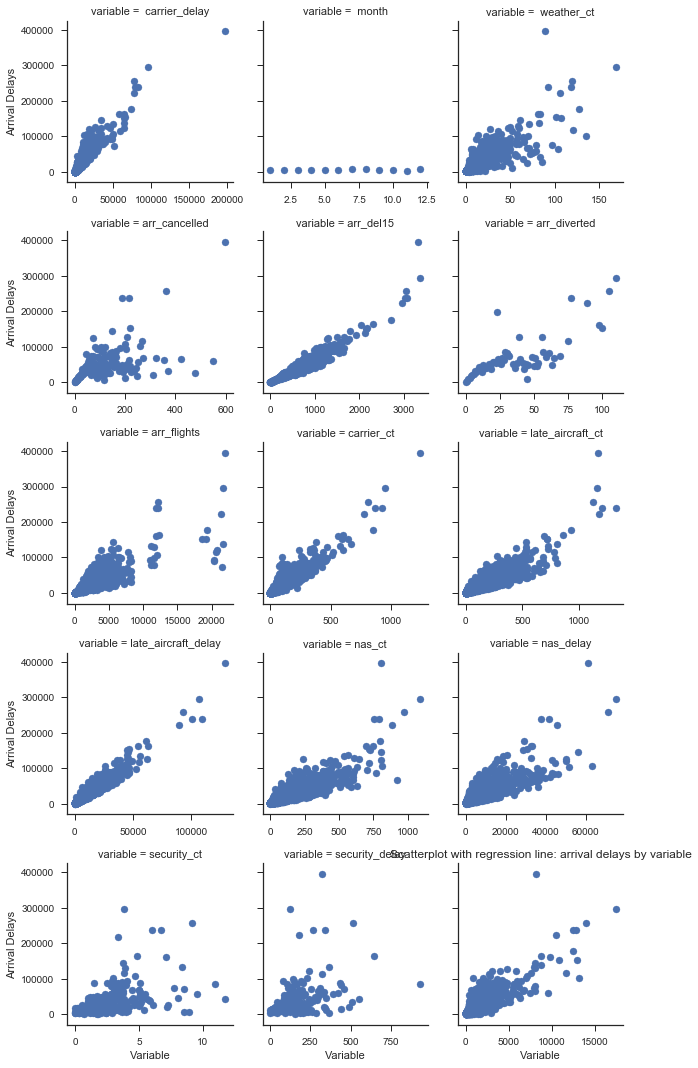

In [8]:
import seaborn as sns
# Showing the  information in a seaborn facet grid.
sns.set(style="ticks")  #Setting the overall aesthetic

g = sns.FacetGrid(df_melt_group, col="variable", col_wrap=3, sharex=False) 
g = g.map(plt.scatter, "value", " arr_delay")
g.set_ylabels("Arrival Delays")
g.set_xlabels("Variable")
plt.title('Scatterplot with regression line: arrival delays by variable')


plt.show()

From this, we can tell that there is not a seasonal effect on arrival delays. 

In [9]:
# make a df with the numbers of interest
df_numerical = df[[' month', 'arr_flights', 'arr_del15', 'carrier_ct', ' weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled',
                   'arr_diverted', ' arr_delay', ' carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].reset_index()

df_numerical.dropna(inplace=True)
df_numerical = df_numerical[df_numerical[' carrier_delay'] < 100000]

Text(0.5,1,'Scatterplot with regression line: arrival delays by Carrier Name')

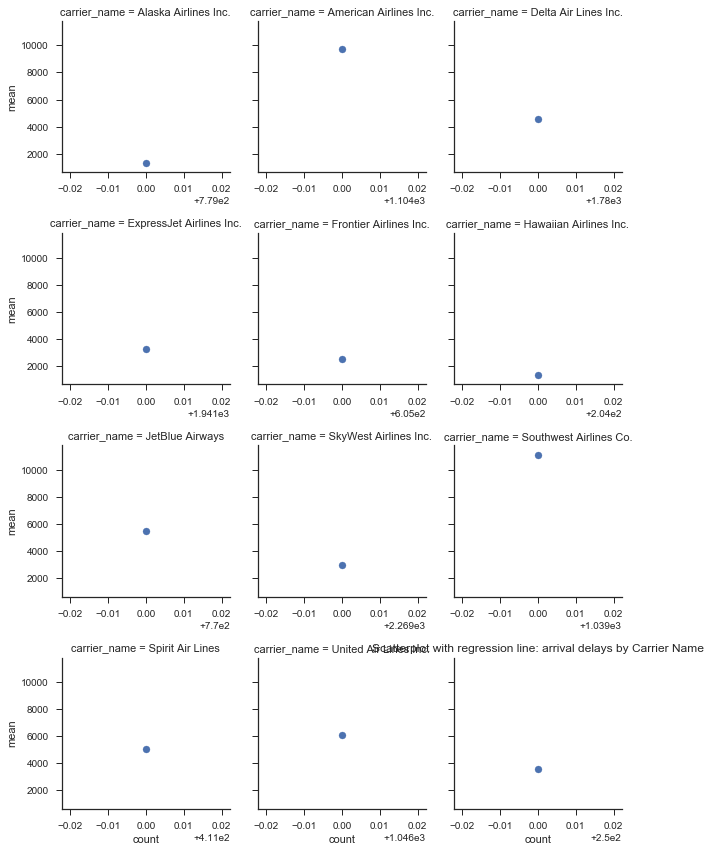

In [10]:
# Do some quick plots on the carrier name -- it does seem to make considerable difference
df_sub = df[[' arr_delay', 'carrier_name', 'airport']]
df_sub_agg = df_sub.groupby('carrier_name')[' arr_delay'].agg({'mean', 'count'}).reset_index()
#df_sub_agg = df_sub_agg.sort_values('count', ascending=False).iloc[0:10]
#df_sub_agg
g = sns.FacetGrid(df_sub_agg, col="carrier_name", col_wrap=3, sharex=False) 
g = g.map(plt.scatter, "count", "mean")

plt.title('Scatterplot with regression line: arrival delays by Carrier Name')

From these graphs we can tell that carrier type does makje a difference. American Airlines and Southwest are qualitatvely more likely to have delayed arrivals than other airline carriers.

https://github.com/tdh512194/CBD_AirlinesArrival/blob/master/Airline%20Arrival.ipynb

In [11]:
# import sv classifier
# from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

from sklearn.svm import SVR
svr = SVR()
# set variables
X = df_numerical.drop([' arr_delay'], 1)
Y = df_numerical[' arr_delay']

svr.fit(X,Y)

# svc = SVC()
cross_val_score(svr, X, Y, cv=5)

array([-0.07687428, -0.07335561, -0.11292924, -0.08236068, -0.09010824])

In [12]:
# create train/test grps
offset = int(X.shape[0] * 0.8)

# 80% train
X_train, Y_train = X[:offset], Y[:offset]

# 20% test
X_test, Y_test = X[offset:], Y[offset:]

Y_train.sum()

47856559.0

In [24]:
#X = X.drop(['index'], axis=1)
# Y = Y.values.tolist()
# L = [len(y) for y in Y]
# np.max(L)
Y

[-42.71082461157976,
 -34.43633874366669,
 -320.4828110955708,
 -991.2282725542224,
 -106.10990411430014,
 476.59870228593115,
 -690.0488706145968,
 637.4274420582383,
 278.8663194215726,
 417.31436831888055,
 -261.30168894890716,
 279.08705575841776,
 3.935783381564602,
 -141.17169178587662,
 -416.9738351372029,
 -36.84366903932015,
 65.18868388318003,
 33.350236930482964,
 -240.08165864432848,
 -10.17081445823139,
 128.84767826688562,
 163.31776780919034,
 331.51999131634204,
 10.59932575352964,
 -107.84566870779221,
 27.77652204876806,
 428.8504783728111,
 -292.68123194273767,
 -276.7734319937481,
 573.522992870298,
 -131.08654330702197,
 120.9473786962142,
 37.65818519699727,
 83.44286856723053,
 109.33008424556121,
 25.00691235470867,
 660.7835016290758,
 130.74825703572822,
 143.27842287193332,
 231.260973739653,
 98.72823406396647,
 143.38598307026095,
 92.27522823730442,
 95.02901758259782,
 -19.695479102596476,
 103.9473786962142,
 200.6895044195638,
 654.571197530919,
 137.20

In [20]:
# Class is binary so do Bernoulli classifier
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X, Y)

# classify, storing results in new variable, y_pred
y_pred = bnb.predict(X)

# display mislabelled pts
print("Num of mislabeled pts out of tot {} pts: {}".format(
    df_numerical.shape[0]), (Y != y_pred).sum())

ValueError: Unknown label type: (array([ -42.71082461,  -34.43633874, -320.4828111 , ..., -614.2541478 ,
       -135.97883211,  -46.50874161]),)

In [14]:
from sklearn import ensemble
params = {'n_estimators': 5, 'max_depth': 2, 'loss': 'deviance'}

clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, Y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(Y_train, predict_train, margins=True)
table_test = pd.crosstab(Y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All', 1]
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All', 0]

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All', 1]
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All', 0]

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

MemoryError: 

In [ ]:
svr = SVR()
# set variables
X = df_numerical.drop([' arr_delay'], 1)
Y = df_numerical[' arr_delay']

svr.fit(X,Y)
cross_val_score(svr, X, Y, cv=5)

Weak learner 0 R^2: -16.784357167311708
Weak learner 20 R^2: -0.0723022714443351
Weak learner 40 R^2: -0.03729384262785285
Weak learner 60 R^2: -0.02367232007514919
Weak learner 80 R^2: -0.012146579359666232
Weak learner 100 R^2: -0.01600506892728748


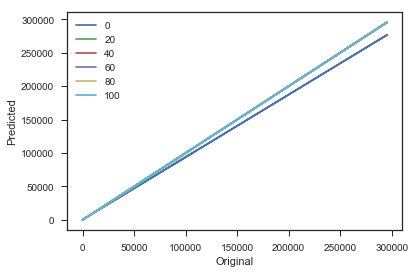

Overall R^2:
0.9998252591517129


In [15]:
# Iterate through decision trees, each time using the residuals
# from the previous tree as the inputs.
from sklearn import tree
uniquex = df_numerical[' arr_delay'].unique()

# Store values from loops.
preds = pd.DataFrame()
labels = []

for m in range(0, 101):

    # Initialize and fit the tree. Set the max depth to 3.
    decision_tree = tree.DecisionTreeRegressor(max_depth=3)
    decision_tree.fit(X, Y)

    # Get and store predicted values.
    pred = decision_tree.predict(X)
    preds['pred{}'.format(m)] = pred

    # Residuals.
    Y = Y - pred

    # Output every 20 iterations.
    if m % 20 == 0:
        print('Weak learner {} R^2: {}'.format(m, decision_tree.score(X, Y)))
        labels = labels + [m]
        bestpred = preds.sum(axis=1)
        plt.plot(uniquex, np.poly1d(np.polyfit(
            df_numerical[' arr_delay'], bestpred, 1))(uniquex))

plt.legend(labels)
plt.xlabel('Original')
plt.ylabel('Predicted')
plt.show()
predicted = preds.sum(axis=1)

print('Overall R^2:')
print(np.corrcoef(df_numerical[' arr_delay'], predicted)[0, 1])